# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [12]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [13]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: How do average monthly premiums change over the policy duration, visualized in a line plot?


**Answer**: The line plot illustrates how average monthly premiums change over the policy duration, allowing for the identification of trends.

## Supporting Analysis

In [14]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=8, repr.plot.height=6)

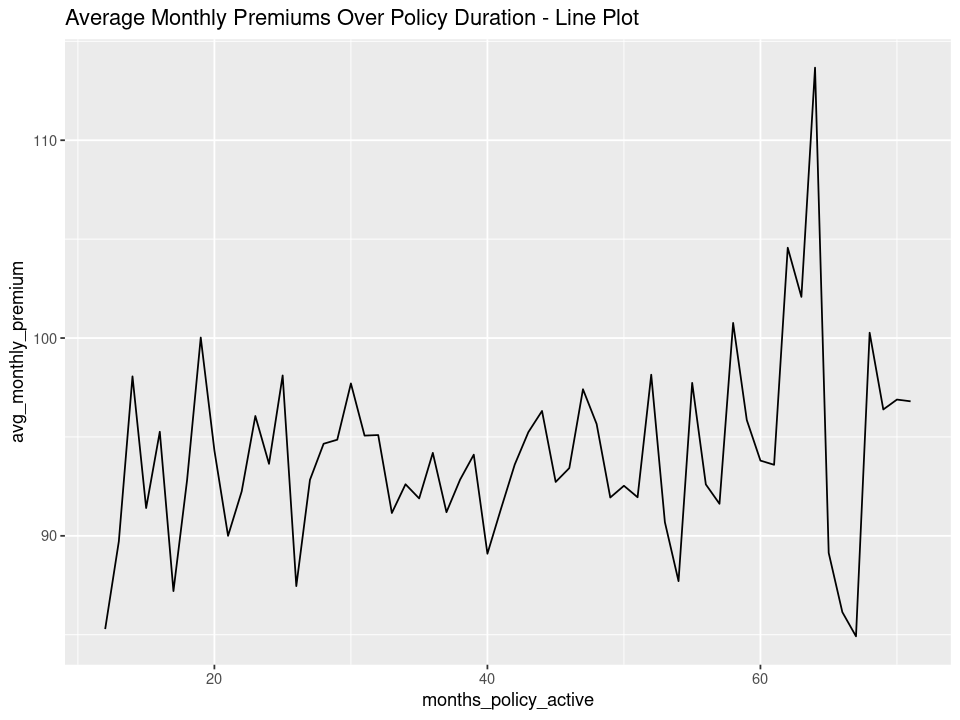

In [15]:
# Line plot for average monthly premiums over policy duration
claims_df %>%
  group_by(months_policy_active) %>%
  summarise(avg_monthly_premium = mean(monthly_premium)) %>%
  ggplot(aes(x = months_policy_active, y = avg_monthly_premium)) +
  geom_line() +
  labs(title = "Average Monthly Premiums Over Policy Duration - Line Plot")


## Question 2


**Question**: How does the claims amount compare across different combinations of employment status and education levels?


**Answer**: The heatmap provides a visual representation of the average claims amount across various combinations of employment status and education levels, offering insights into potential trends or patterns.


## Supporting Analysis


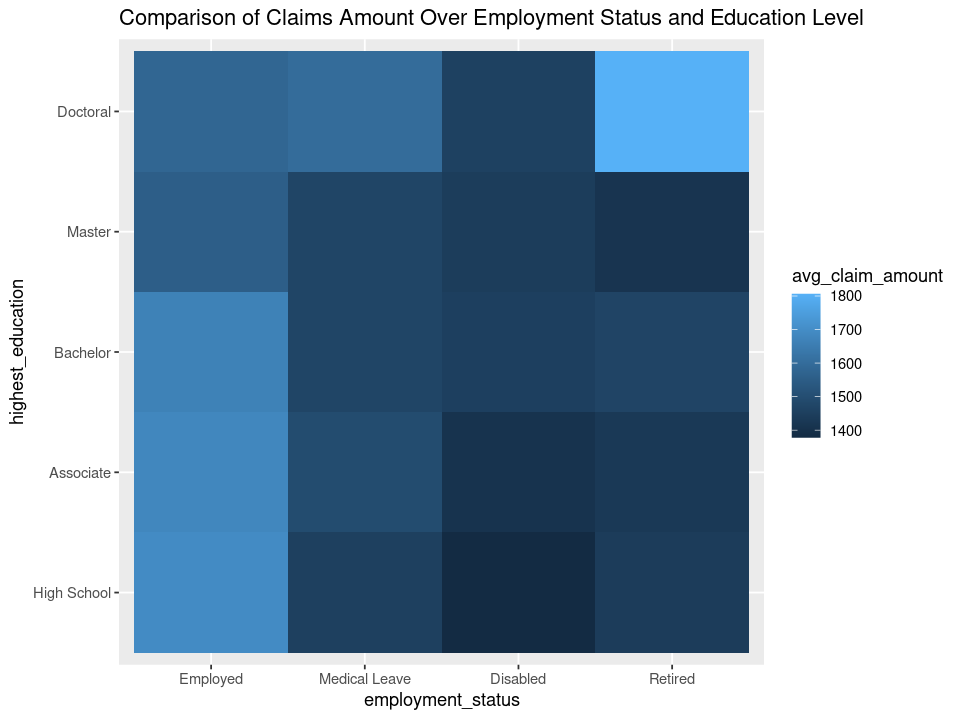

In [16]:
# Heatmap for claims amount based on employment status and education level
claims_df %>%
  group_by(employment_status, highest_education) %>%
  summarise(avg_claim_amount = mean(current_claim_amount), .groups = 'drop') %>%
  ggplot(aes(x = employment_status, y = highest_education, fill = avg_claim_amount)) +
  geom_tile() +
  labs(title = "Comparison of Claims Amount Over Employment Status and Education Level")


## Question 3


**Question**: How does the distribution of total claims amount differ based on gender and coverage type?


**Answer**: The faceted histogram for total claims amount by gender and coverage type provides a visual comparison of the distribution of total claims amount across different coverage types for each gender. It aids in understanding the variation in claims amounts based on these factors.


## Supporting Analysis


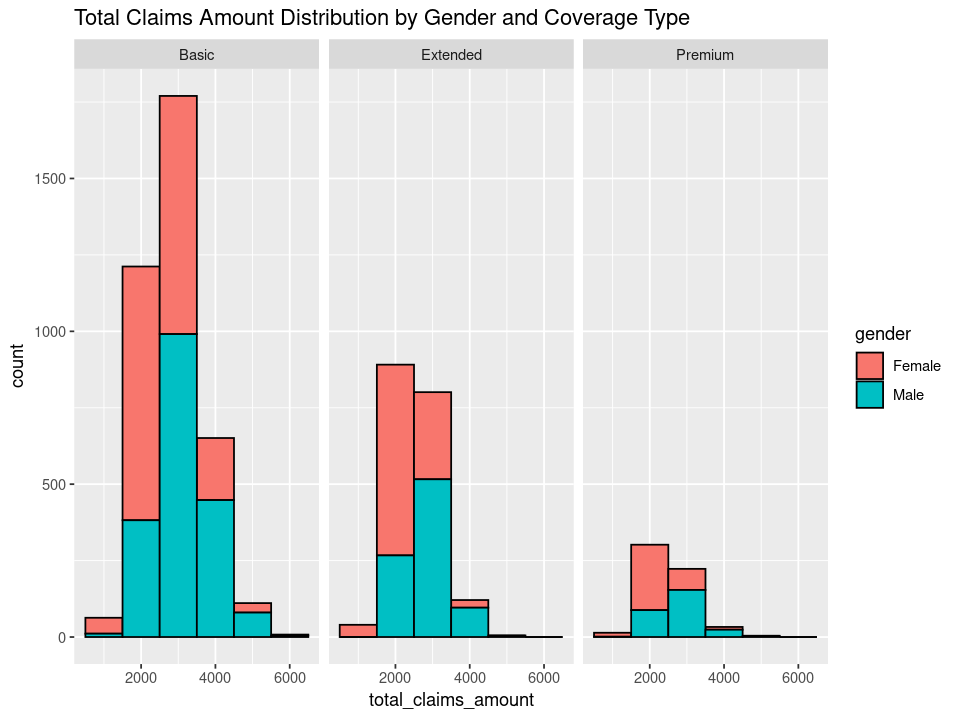

In [17]:
# Faceted histogram for total claims amount by gender and coverage type
ggplot(claims_df, aes(x = total_claims_amount, fill = gender)) +
  geom_histogram(binwidth = 1000, color = "black") +
  facet_wrap(~coverage) +
  labs(title = "Total Claims Amount Distribution by Gender and Coverage Type")


## Question 4


**Question**: How does the density of monthly premiums vary for different vehicle sizes?


**Answer**: The density plot illustrates how the distribution of monthly premiums varies across different vehicle sizes, helping to identify patterns in premium amounts.


## Supporting Analysis


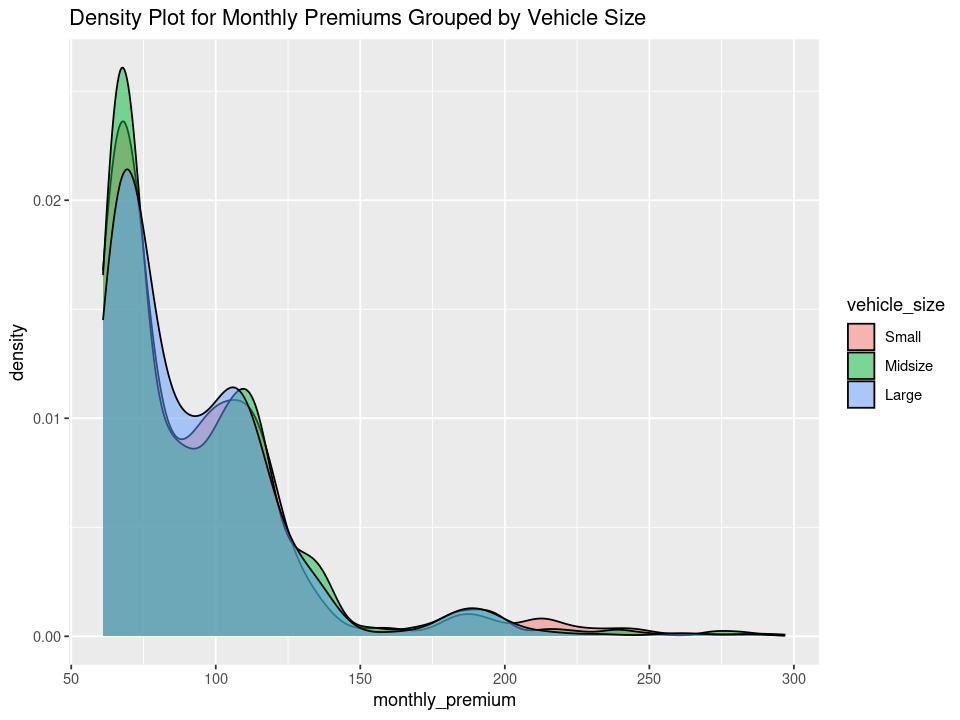

In [18]:
# Density plot for monthly premiums grouped by vehicle size
ggplot(claims_df, aes(x = monthly_premium, fill = vehicle_size)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot for Monthly Premiums Grouped by Vehicle Size")


## Question 5


**Question**: Is there a significant difference in claims amount between customers residing in urban and suburban areas?


**Answer**: The box plot for claims amount based on residence type compares the distribution of claims between urban and suburban areas. It aids in identifying any significant differences in claims amount based on the customer's residence type.



## Supporting Analysis


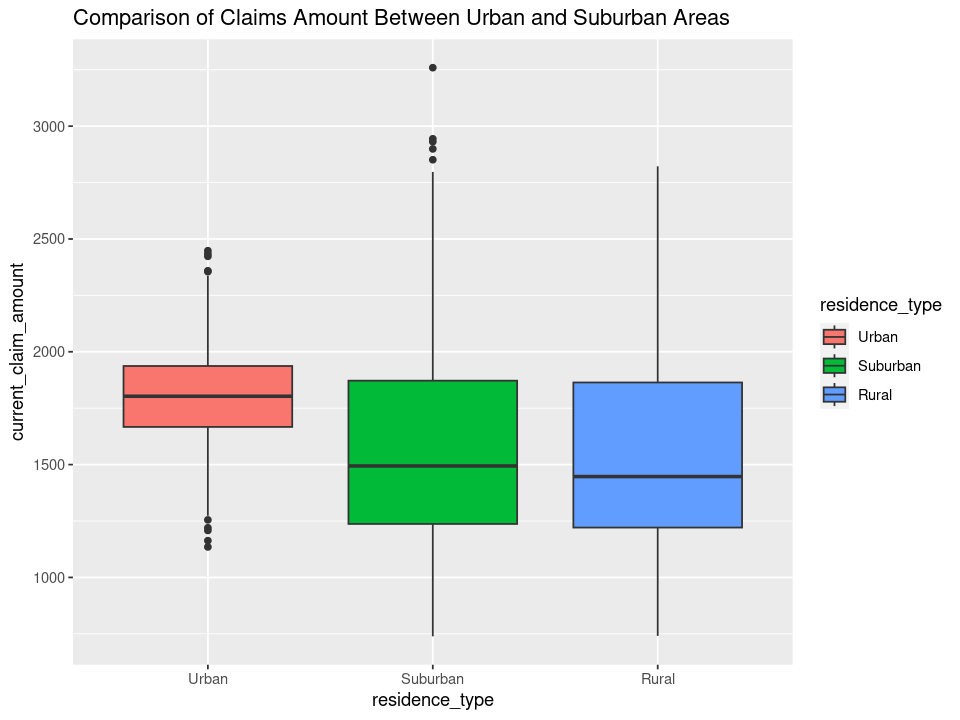

In [19]:
# Box plot for claims amount based on residence type
ggplot(claims_df, aes(x = residence_type, y = current_claim_amount, fill = residence_type)) +
  geom_boxplot() +
  labs(title = "Comparison of Claims Amount Between Urban and Suburban Areas")


## Question 6


**Question**: Are there gender-based and state-based differences in the number of claims filed?

**Answer**: The bar chart visually indicates that there are gender-based and state-based differences in the number of claims filed. Each facet represents a different state, and within each state, the bars compare the total number of claims filed by different genders. By examining the chart, we can identify patterns and disparities in the distribution of claims across both gender and state categories.


## Supporting Analysis


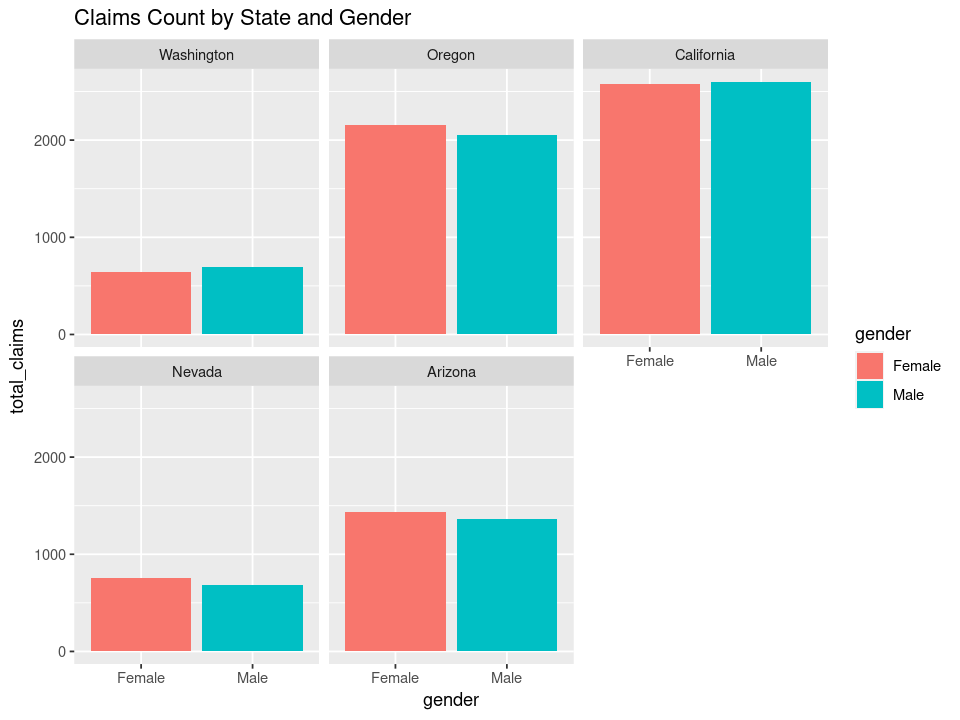

In [20]:
# Bar chart for claims count faceted by state and gender
claims_df %>%
  group_by(customer_state, gender) %>%
  summarise(total_claims = sum(total_claims), .groups = 'drop') %>%
  ggplot(aes(x = gender, y = total_claims, fill = gender)) +
  geom_bar(stat = "identity") +
  facet_wrap(~customer_state) +
  labs(title = "Claims Count by State and Gender")


## Question 7


**Question**: Can we visually explore the relationship between income, monthly premium, and total claims in a dynamic 3D plot?



**Answer**: The interactive 3D scatter plot provides a dynamic view of the relationship between income, monthly premium, and total claims. Users can interactively explore the data points, identify clusters, and observe if there are any trends based on policy type. This visualization helps in gaining a comprehensive understanding of the multivariate relationships.


## Supporting Analysis


In [21]:

# Load library
library(plotly)

# Interactive 3D scatter plot
plot_ly(claims_df, 
        x = ~income, y = ~monthly_premium, z = ~total_claims, color = ~policy,
        text = ~customer_id, 
        mode = "markers",
        marker = list(sizemode = "diameter")) %>%
  layout(title = "3D Scatter Plot: Income, Monthly Premium, and Total Claims",
         scene = list(xaxis = list(title = "Income"),
                      yaxis = list(title = "Monthly Premium"),
                      zaxis = list(title = "Total Claims")))


No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter3d

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter3d



HTML widgets cannot be represented in plain text (need html)

## Question 8


**Question**: How does the distribution of claims amount vary across different vehicle sizes, and is there a gender-based impact?



**Answer**: The faceted box plots show the distribution of claims amount for different vehicle sizes, with separate facets for each gender. This visualization allows us to compare the spread and central tendency of claims amount within each vehicle size category, as well as to identify any gender-specific patterns. It helps in understanding how vehicle size and gender may contribute to variations in claims amount.


## Supporting Analysis


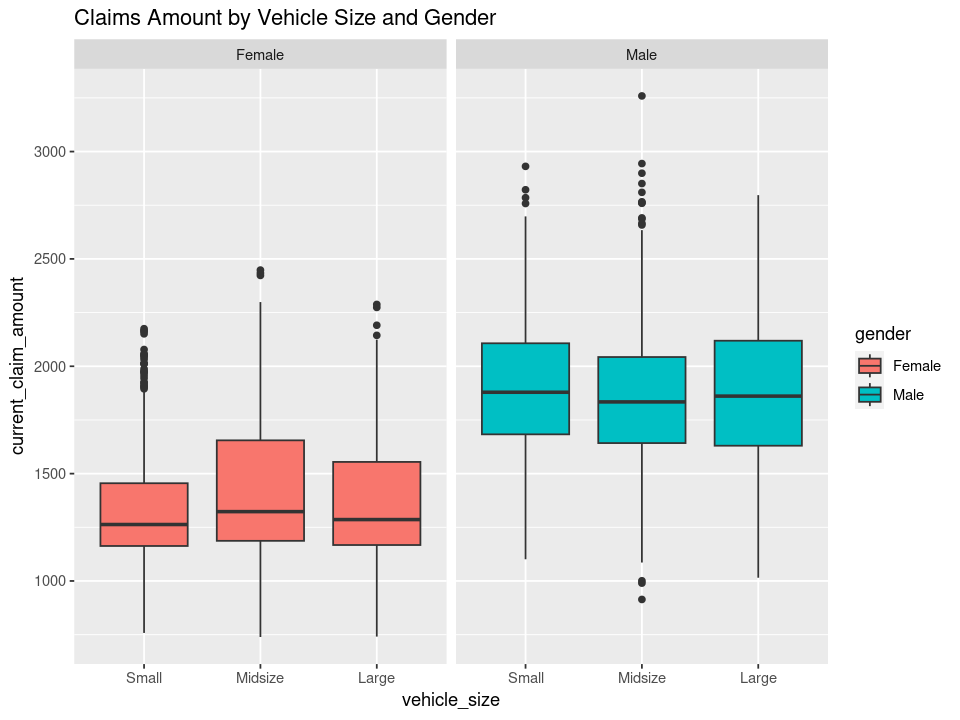

In [22]:
# Faceted box plots for claims amount by vehicle size and gender
ggplot(claims_df, aes(x = vehicle_size, y = current_claim_amount, fill = gender)) +
  geom_boxplot() +
  facet_wrap(~gender) +
  labs(title = "Claims Amount by Vehicle Size and Gender")


# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.


**Executive Summary**

**Introduction**
In the competitive landscape of the automobile insurance industry, maintaining profitability and enhancing operational efficiency are critical imperatives for sustained success. Our data analysis endeavors to address the pressing challenges faced by the company operating in the southwest and western regions of the United States. The primary aim is to uncover actionable insights that will inform strategic decision-making, particularly in the areas of pricing optimization, operational enhancements, and policy adjustments.

**Highlights and Key Findings**

Policy Duration and Premium Trends:
We observed notable trends in average monthly premiums over policy duration, highlighting the importance of dynamic pricing strategies to optimize customer retention and profitability.

Employment Status and Education Level Impact on Claims:
The analysis revealed intriguing correlations between employment status, education levels, and claims amount, suggesting the need for targeted risk management strategies tailored to specific customer demographics.

Gender and Coverage Type Differences in Claims Amount:
Gender-based and coverage type-specific disparities in claims amount were identified, underscoring the importance of nuanced pricing approaches and coverage offerings to mitigate risks and enhance profitability.

Vehicle Size and Premium Distribution:
Variations in premium distribution across different vehicle sizes signify opportunities for customized pricing structures and policy adjustments tailored to vehicle characteristics.

Residence Type and Claims Amount:
Significant differences in claims amount between urban and suburban areas highlight the need for geographic-specific risk assessments and targeted marketing efforts to address regional disparities.

Gender and State-Based Claims Patterns:
Gender-based and state-specific differences in claims filing patterns emphasize the importance of localized risk management strategies and customer engagement initiatives to address regional variations effectively.

Multivariate Relationship Exploration:
The interactive 3D scatter plot facilitated a comprehensive exploration of the intricate relationships between income, monthly premiums, and total claims, offering valuable insights for strategic decision-making and customer segmentation.

Vehicle Size and Gender Impact on Claims Amount:
Analysis of claims amount distribution across vehicle sizes, considering gender-specific patterns, underscores the significance of vehicle characteristics and gender dynamics in influencing claims behavior and risk assessment.

**Recommendations**

Dynamic Pricing and Policy Duration Optimization:
Implement dynamic pricing models that adjust premiums based on policy duration to incentivize longer-term policies, thereby enhancing customer retention and lifetime value.
Business Impact: Improved customer retention rates and increased policy tenure can lead to enhanced profitability and long-term revenue growth.

Targeted Marketing and Customer Segmentation:
Develop targeted marketing strategies based on demographic and geographic insights to effectively acquire and retain customers, leveraging regional variations in claims behavior and customer preferences.
Business Impact: Enhanced customer acquisition and retention rates, increased market share, and improved customer satisfaction metrics.

Continuous Monitoring and Adaptation:
Establish a robust system for continuous monitoring of claims patterns, market dynamics, and customer preferences to adapt pricing strategies, policies, and operational processes iteratively.
Business Impact: Agility in responding to changing market conditions, optimization of operational efficiency, and sustained competitive advantage in the dynamic insurance landscape.

Interactive Visualization Tools Implementation:
Invest in interactive visualization tools to facilitate exploratory data analysis, enabling decision-makers to gain deeper insights into complex data relationships and make informed strategic decisions.
Business Impact: Enhanced data-driven decision-making capabilities, improved efficiency in strategic planning processes, and accelerated innovation in product offerings and customer experiences.

**Conclusion**

In conclusion, the findings from our data analysis offer valuable insights and actionable recommendations to address the challenges faced by the company. By implementing the recommended strategies, the company can enhance its competitiveness, optimize profitability, and position itself for sustainable growth and success in the ever-evolving automobile insurance market.